<a href="https://colab.research.google.com/github/Ja-Galeano/proyecto_integrado_2.JA/blob/main/Educacion_Argentina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define possible values for columns
apellidos = ['Gonzalez', 'Rodriguez', 'Perez', 'Gomez', 'Lopez', 'Martinez', 'Garcia', 'Sanchez', 'Romero', 'Torres']
nombres = ['Juan', 'Maria', 'Jose', 'Ana', 'Carlos', 'Laura', 'Pedro', 'Sofia', 'Luis', 'Elena']
materias = ['Matemáticas', 'Lengua', 'Historia', 'Ciencias Sociales', 'Ciencias Naturales', 'Inglés', 'Educación Física', 'Música', 'Artes', 'Tecnología']

# Generate data for 100 rows
num_rows = 100
data = []
for _ in range(num_rows):
  apellido = random.choice(apellidos)
  nombre = random.choice(nombres)
  dni = random.randint(10000000, 99999999)  #Simulate DNI
  materia = random.choice(materias)
  nota1 = random.randint(1, 10)
  nota2 = random.randint(1, 10)
  nota3 = random.randint(1, 10)
  faltas = random.randint(0, 20)
  data.append([apellido, nombre, dni, materia, nota1, nota2, nota3, faltas])

# Create the DataFrame
df = pd.DataFrame(data, columns=['Apellido', 'Nombre', 'Nro_DNI', 'Materia', 'Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre', 'Faltas a clases'])

# Print the DataFrame
df

,Apellido,Nombre,Nro_DNI,Materia,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a clases
0,Gonzalez,Laura,21790417,Lengua,6,9,8,11
1,Rodriguez,Sofia,53641671,Lengua,3,7,5,6
2,Perez,Jose,75171317,Tecnología,10,7,8,1
3,Sanchez,Maria,64808541,Artes,3,10,1,15
4,Martinez,Maria,56850878,Artes,8,10,5,7
...,...,...,...,...,...,...,...,...
95,Garcia,Maria,51131108,Matemáticas,1,6,2,12
96,Martinez,Ana,74190168,Matemáticas,8,8,9,16
97,Sanchez,Luis,67475572,Inglés,1,8,7,17
98,Lopez,Sofia,41089282,Música,2,9,8,17


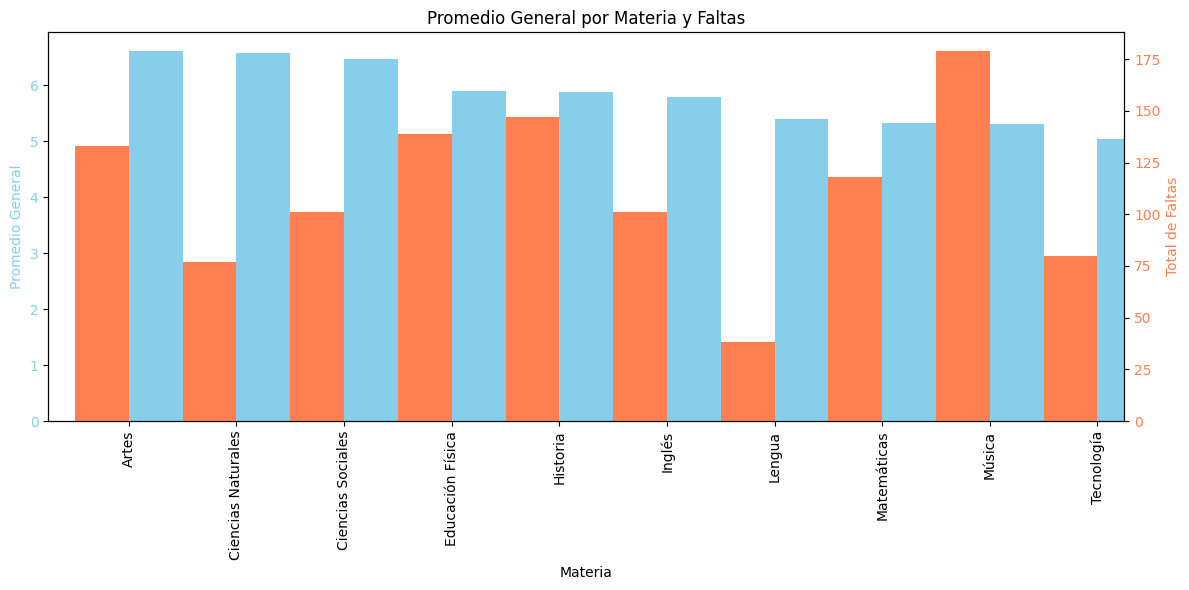

In [2]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby('Materia')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby('Materia')['Faltas a clases'].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
average_grades.plot(kind='bar', color='skyblue', ax=ax1, position=0)
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xlabel('Materia')
ax1.set_title('Promedio General por Materia y Faltas')

# Create a second y-axis for absences
ax2 = ax1.twinx()

# Plot total absences
total_absences.plot(kind='bar', color='coral', ax=ax2, position=1)
ax2.set_ylabel('Total de Faltas', color='coral')
ax2.tick_params(axis='y', labelcolor='coral')


# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [3]:
df.to_csv("datos_alumnos.csv", index=False)